In [19]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
# create IoT Analytics client
client = boto3.client('iotanalytics', region_name='ap-northeast-1', api_version=None,
               use_ssl=True, verify=None, endpoint_url=None,
               aws_access_key_id='<your key id>', aws_secret_access_key='<your access key>',
               aws_session_token='<your session token>', config=None)
dataset = "<your dataset name>"
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']

In [21]:
df = pd.read_csv(dataset_url)
df = df.drop(columns='__dt') 

In [22]:
df

,timestamp,battery_state_of_charge,location,instantaneous_discharge,fluid_velocity,accumulated_heat
0,1630998481912,42.5,"{longitude=48.15743, latitude=11.57549}",1.553817,0.874463,999.459588
1,1630998486924,42.5,"{longitude=48.15743, latitude=11.57549}",11.127831,2.152040,2003.636918
2,1630998491938,42.5,"{longitude=48.15743, latitude=11.57549}",-0.329591,-0.735260,998.655588
3,1630998496949,42.5,"{longitude=48.15743, latitude=11.57549}",9.462952,0.439964,1997.107182
4,1630998501961,42.5,"{longitude=48.15743, latitude=11.57549}",0.446229,-1.647324,1000.577321
...,...,...,...,...,...,...
197,1630999238590,42.5,"{longitude=48.15743, latitude=11.57549}",10.585396,2.969446,1999.860313
198,1630999243601,42.5,"{longitude=48.15743, latitude=11.57549}",1.625401,0.010335,996.622003
199,1630999248612,42.5,"{longitude=48.15743, latitude=11.57549}",12.589846,0.064973,2001.571665
200,1630999253621,42.5,"{longitude=48.15743, latitude=11.57549}",3.230518,1.214577,998.376095


In [23]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit = 'ms')

In [24]:
df

,timestamp,battery_state_of_charge,location,instantaneous_discharge,fluid_velocity,accumulated_heat
0,2021-09-07 07:08:01.912,42.5,"{longitude=48.15743, latitude=11.57549}",1.553817,0.874463,999.459588
1,2021-09-07 07:08:06.924,42.5,"{longitude=48.15743, latitude=11.57549}",11.127831,2.152040,2003.636918
2,2021-09-07 07:08:11.938,42.5,"{longitude=48.15743, latitude=11.57549}",-0.329591,-0.735260,998.655588
3,2021-09-07 07:08:16.949,42.5,"{longitude=48.15743, latitude=11.57549}",9.462952,0.439964,1997.107182
4,2021-09-07 07:08:21.961,42.5,"{longitude=48.15743, latitude=11.57549}",0.446229,-1.647324,1000.577321
...,...,...,...,...,...,...
197,2021-09-07 07:20:38.590,42.5,"{longitude=48.15743, latitude=11.57549}",10.585396,2.969446,1999.860313
198,2021-09-07 07:20:43.601,42.5,"{longitude=48.15743, latitude=11.57549}",1.625401,0.010335,996.622003
199,2021-09-07 07:20:48.612,42.5,"{longitude=48.15743, latitude=11.57549}",12.589846,0.064973,2001.571665
200,2021-09-07 07:20:53.621,42.5,"{longitude=48.15743, latitude=11.57549}",3.230518,1.214577,998.376095


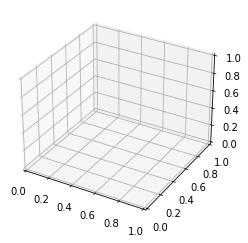

In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

In [26]:
for index, row in df.iterrows():
    ax.scatter(row['instantaneous_discharge'], row['fluid_velocity'], row['accumulated_heat'])
ax.set_xlabel('instantaneous_discharge (m^3/hr)')
ax.set_ylabel('fluid_velocity (m/s)')
ax.set_zlabel('accumulated_heat (J)')


Text(0.11410640661270847, 0.015287359751546192, 'accumulated_heat (J)')

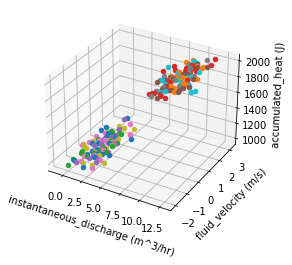

In [27]:
fig